In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/BT_AI_CNN/coi chi tay/train_chi_tay'

In [4]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 38 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [5]:
train_dataset.classes
print(train_dataset.class_indices)

{'chi tay nam': 0, 'chi tay nu': 1}


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

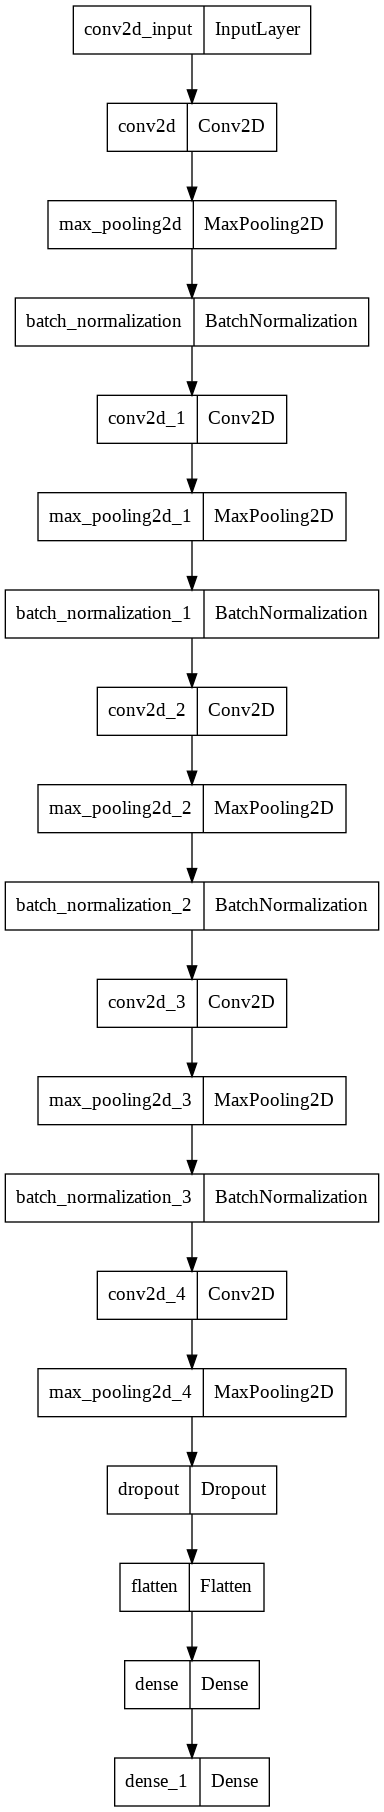

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [8]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
38/38 [==============================] - 15s 353ms/step - loss: 0.6012 - accuracy: 0.7105 - val_loss: 0.6432 - val_accuracy: 0.5000
Epoch 2/20
38/38 [==============================] - 4s 103ms/step - loss: 0.4027 - accuracy: 0.8158 - val_loss: 0.8769 - val_accuracy: 0.5000
Epoch 3/20
38/38 [==============================] - 3s 88ms/step - loss: 0.1493 - accuracy: 0.9737 - val_loss: 0.7529 - val_accuracy: 0.5000
Epoch 4/20
38/38 [==============================] - 3s 87ms/step - loss: 0.2209 - accuracy: 0.9474 - val_loss: 1.0111 - val_accuracy: 0.5000
Epoch 5/20
38/38 [==============================] - 3s 89ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 1.1637 - val_accuracy: 0.5000
Epoch 6/20
38/38 [==============================] - 3s 88ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.1870 - val_accuracy: 0.5000
Epoch 7/20
38/38 [==============================] - 3s 88ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.2041 - val_accuracy: 0.5000
Epoch 8/20

 chi tay nu


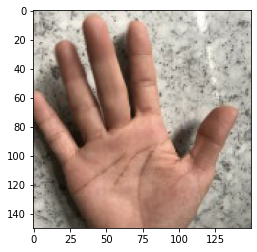

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/BT_AI_CNN/coi chi tay/nhandien/chitaynu.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" chi tay nam")
if(test==1):
    print(" chi tay nu")

 chi tay nam


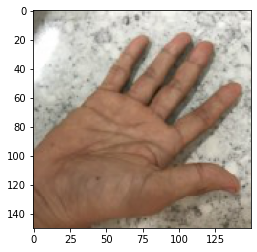

In [11]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/BT_AI_CNN/coi chi tay/nhandien/chitaynam.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" chi tay nam")
if(test==1):
    print(" chi tay nu")